<a href="https://colab.research.google.com/github/fantajeon/DLPytorch1.2/blob/master/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch 1.2 버전 설치

Author: Hyeokjune Jeon(fantajeon@gmail.com)

Colab을 통하여 작성했으며, 기본적인 패키지들은 설치가 되어있습니다. 예를들면, matplotlib같은 것입니다.

In [0]:
!pip install -q --upgrade torch==1.2 torchvision==0.4

     |████████████████████████████████| 748.9MB 24kB/s 
     |████████████████████████████████| 8.8MB 47.1MB/s 


PyTorch 버전은 1.2.0 기준입니다.

In [0]:
from __future__ import print_function

import torch
torch.__version__

'1.2.0'

차후에 화면에 그래프를 그릴 것이기 때문에 미리 import 해 놓습니다.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# 이제 시작해 보겠습니다.
이 번은 맛보기입니다. 한번 경험을 통해서 계속해서 개념들을 더해가면서, 딥러닝에 익숙해지도록 해보겠습니다. 많은 부분을 지금 당장 이해하지 않으셔도 됩니다. 바로 보고 이해하신다고 하면, 이미 기존에 기초가 탄탄하셨던 분일 것입니다. 너무 좌절하지 하지 마시고, 천천히 진행해 보겠습니다.

## 꼭 알아야할 내용
1. $x$,$y$로부터 $w$,$b$를 찾는다.
2. 모델은 $y=wx + b$  이다.
3. 미분
4. Loss 함수와 연관하여 $w$,$b$를 찾는 과정: gradient descent, learning rate, backpropagation(chain rule).

나열한 단어들간에 개념 연결입니다.

다음 주어진 x, y 데이터를 근거로 w, b를 찾아라



$$y = wx + b$$

일반적으로 w, b의 값을 선언할때 값을 지정을 해줘야 합니다. 보통은 random하게 값을 지정해 줍니다. 

계속 진행하면서 전역변수 x, y, w, b임을 기억해주세요.


In [0]:
# dataset
x = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], dtype=torch.float32)
y = torch.tensor([15, 25, 40, 55, 65, 66], dtype=torch.float32)
# requires_grad=True는 미분 값을 가진다는 것임.
w = torch.rand(1, dtype=torch.float32, requires_grad=True)
b = torch.rand(1, dtype=torch.float32, requires_grad=True)

# model parameter, w and b
def model(x):
  return w*x + b

pred_y = model(x)
print(pred_y)

tensor([0.2815, 0.3271, 0.3726, 0.4182, 0.4638, 0.5094],
       grad_fn=<AddBackward0>)


이제 학습할 목표를 설계해야 합니다. x로부터 예측한 pred_y와 관촬된 y의 관계를 정의해야 합니다.
여러가지 있지만 지금은 가장 단순한 방법인 두 변수의 오차의 제곱으로 해봅니다. 
$$L = \frac{1}{2} \sum { (\text{pred_y} - y)^2 } $$를 합니다.
보통 여기서 L을 loss 함수라고 합니다. 이 값을 줄이면, 우리가 원하는 w, b값을 정확히 찾을 수 있을 거라고 희망하면서 진행합니다.

In [0]:
def loss(pred_y, y):
  return 0.5*(pred_y - y).pow(2.0).sum()

이제 이 것을 미분해서 기울기가 작은쪽으로 가도록 w, b를 천천히 움직여 봅시다. PyTorch에서는 backward() 함수를 호출하여, 이 두 변수의 미분값을 계산합니다. 신기합니다!! 자동으로 미분을 해줍니다. 미분은 무엇일까요? 쉽게 말하면, 어느 한점에서의 미세한 주변의 변화율입니다. 이건 PyTorch가 연산 과정을 내부적으로 다 기록을 해놓고(computation graph칭함), 이 기록의 근거하여 자동으로 미분값을 계산할 수 있습니다. **이 주변의 변화율을 관찰하여 최적의 위치를 찾아가는 여러 방법이 있습니다.** 여기서는 그 중에서 많이 언급하는 **gradient descent** 방법을 소개합니다. 가장 단순한 최적화 기법이며, 앞으로 최적화를 찾는 과정은 여기서부터 개선점이 시작됩니다. 너무 많은 정보는 지금 어려울 수 있으니, 그렇다 치고 넘어갑시다.

추가적인 용어를 소개 합니다. Optimization은 최적화를 하는 과정인 일반적인 용어입니다. Optimizer는 최적화를 하는 알고리즘을 칭합니다. 그러면 optimizer를 무엇으로 썼냐? gradient descent 기법을 썼습니다. 이러면 됩니다. 또는 Gradient Descent Optimization Algorithm이렇게 쓰기도 합니다.




In [0]:
pred_y = model(x)
L = loss(pred_y, y)
L.backward()
print("gradient of w", w.grad)
print("gradient of b", b.grad)

gradient of w tensor([-111.6898])
gradient of b tensor([-263.6274])


**Gradient Decendent 방법으로 최적화를 해보자!**
$$\begin{equation} 
w_{t+1} = w_{t} - \eta \frac{\partial L}{\partial w} \\
b_{t+1} = b_{t} - \eta \frac{\partial L}{\partial b}
\end{equation}$$
여기서 t와 t+1은 업데이트 순서입니다. 이것의 의미는 현재 값을 기준으로 미분한 방향에서 L값이 작은 쪽으로 값을 이동합니다. 그리고 $\eta$는 learning rate라고 합니다. 이번 순서($t$)에서 $w$와  $b$를 얼마만큼 움직여서 오차($L$)를 줄여나갈지 결정해 줍니다. 주의할 점은 너무 크게 또는 작게 $w$와 $b$를 움직이면 학습에 실패할 수 있다.

<img width='720px' src='https://fantajeon.github.io/DLPytorch1.2_Materials/images/gradient_descent.svg' />

이 learning rate로 한번에 학습을 하지 않는다는 이야기는 반복적으로 적당하게 w,b를 움직이면서 L값을 관촬해야 한다는 것입니다.

$\frac{\partial L}{\partial w}$는 $L$과 $w$의 관계를 잘 설명합니다. 예를들어 그림에 근거해서 설명하면 $w_{t}$가 1번 지점에서 $w$가 티끌만큼($\triangle w$) 오른쪽으로 움직이면, $L$은 증가를 할 것입니다. $w$가 티끌만큼 왼쪽으로 이동시키면, $L$은 감소를 할 것입니다. 이에 반하여 반대로 2번 지점에서는 $w_{t}$ 반대로 움직일 것입니다. 그런데 잘 보시면, $\triangle w$를 오른쪽 방향으로 고정해보면, $\triangle L$의 반대 방향으로 $w$를 일관되게 이동하면 됩니다. 그래서 gradient descent할때 마이너를 곱해줍니다.

이제 이 비례 관계를 모든 $w$에서 저희는 직접 알고 있다면, $L$의 변화량을 보고, $w$를 움직일 수 있을 것입니다. 그런데 반대로 $L$을 먼저 관찰해야 합니다. 왜 $L$를 먼저 관찰을 할까요? 이유는 예측한 pred_y와 관측된 y의 오차를 $L$로 정의했기 때문입니다. $L$가 주어졌다고 볼 수 있습니다. 저희가 찾는건 $w$이기 때문입니다. 당연히 $L$의 변화가 증가하면, $w$는 왼쪽으로 조금씩 움직이고, $L$의 변화가 감소하면 $w$를 오른쪽으로 조금씩 움직이면 됩니다. 이 $L$과 $w$의 관계를 잘 설명해주는 것이 gradient인 바로 $\frac{\partial L}{\partial w}$입니다.

만일 $L$에 오차라면 오차가 줄어드는 쪽으로 $\frac{\partial L}{\partial w}$을 관촬하여 $w$를 움직여 줄 수 있을 겁니다.

휴~ 많이 따라 오셨습니다. 이제 하나로 묶어서 L값을 관찰해보겠습니다.

In [0]:
learning_rate = 0.0001

for step in range(300000):
  # PyTorch는 Dynamic하게 연산을 기록하는 기능 때문에, 
  # 매번 loop에서 x-->loss-->backward()-->gradient descent를 해줘야 함.
  pred_y = model(x)
  L = loss(pred_y, y)
  L.backward()

  # torch.no_grad()는 computation graph에 기록하지 않는다.
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

  if step % 10000 == 0:
    print("Step:{}, L:{:.5}, w={:.3}, b={:.3}, grad(w)={:.3}, grad(b)={:.3}".format(step, L.item(), w.item(), b.item(), w.grad.item(), b.grad.item()))

  w.grad.zero_()
  b.grad.zero_()

Step:0, L:6914.4, w=0.478, b=0.289, grad(w)=-2.23e+02, grad(b)=-5.27e+02
Step:10000, L:646.1, w=28.7, b=35.0, grad(w)=-13.0, grad(b)=4.31
Step:20000, L:485.54, w=40.6, b=30.8, grad(w)=-11.0, grad(b)=3.96
Step:30000, L:367.89, w=50.8, b=27.1, grad(w)=-9.43, grad(b)=3.39
Step:40000, L:281.67, w=59.5, b=24.0, grad(w)=-8.07, grad(b)=2.9
Step:50000, L:218.49, w=67.0, b=21.3, grad(w)=-6.91, grad(b)=2.48
Step:60000, L:172.2, w=73.4, b=19.0, grad(w)=-5.91, grad(b)=2.13
Step:70000, L:138.28, w=78.9, b=17.0, grad(w)=-5.06, grad(b)=1.82
Step:80000, L:113.42, w=83.6, b=15.3, grad(w)=-4.33, grad(b)=1.56
Step:90000, L:95.202, w=87.6, b=13.9, grad(w)=-3.71, grad(b)=1.33
Step:100000, L:81.854, w=91.0, b=12.7, grad(w)=-3.17, grad(b)=1.14
Step:110000, L:72.072, w=93.9, b=11.6, grad(w)=-2.72, grad(b)=0.977
Step:120000, L:64.902, w=96.5, b=10.7, grad(w)=-2.33, grad(b)=0.839
Step:130000, L:59.654, w=98.6, b=9.94, grad(w)=-1.99, grad(b)=0.714
Step:140000, L:55.803, w=1e+02, b=9.28, grad(w)=-1.71, grad(b)=0.

w는 110근처, b는 5.7 근처에서 찾았습니다. 이제 화면에 그려보도록 하겠습니다.

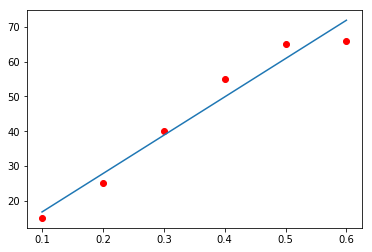

In [0]:
# numpy는 공학자들이 많이 쓰는 공학용 계산 framework입니다. PyTorch는 Numpy와 호환이 잘 되도록 설계되었습니다.
x_numpy = x.numpy()
y_numpy = y.numpy()
# 아래에 detach는 연산을 기록하는 graph에서 때낸다. 향후 어떠한 연산을 해도 그래프에 기록되지 않을 것입니다.
pred_y = model(x).detach().numpy()  
plt.plot(x_numpy,y_numpy,'ro')
plt.plot(x_numpy,pred_y,label='Fitted line')

# Computation Graph란?
그래프에 노드에 변수와 에지에 연산의 개념을 연결시켜서, 입력 변수들이 어떠한 복잡한 계산 과정거치면서 출력 변수까지 연결되어 있는지 기록되어 있는 자료구조입니다. 
보통 두 과정으로 분류 합니다.
1. forward 과정: 이러한 과정을 입력에서 출력까지 그래프 계산하는 과정을 모두 기억을 한다.
2. backward 과정: 기억한 모든 과정을 역순서로 미분 관점에서 전파한다. 특히 오차(Loss)에 근거하여 chain rule이 자동으로 적용된 미분값 계산합니다. 이건 backpropagation algorithm 으로 알려져 있습니다. 이 과정을 통해서 learning rate와 함께 병합하여 학습이 진행됩니다.

이렇게 모든 과정을 기록하고 기본 제공 연산들에 미분을 미리 계산해놨기 때문에, 계산 과정을 단순히 기록한 computation graph를 통하여 pytorch는 chain rule이 적용된 자동 미분이 가능해집니다.

결국 사전에 언급한 gradient descent에서 미분값이 자동으로 계산됩니다.

## Chain Rule을 품은 Computation Graph기반 Backpropagation의 관계

![Computation Graph](https://fantajeon.github.io/DLPytorch1.2_Materials/images/Chain%20Rules%20-%20Computation%20Graph.svg)
이 그림은 이해를 돕기위해서 한 개의 $x$, $y$의 샘플을 가지고 Computation Graph를 표현한 것입니다. 초록색은 학습할 변수 노드이고, <span style="color:blue">파란색 노드</span>는 주어진 상수입니다. 그리고 붉은색 $L$노드는 학습 오차량입니다. 왼쪽에서 오른쪽으로 진행하면 forward 과정(곱하기 > 더하기 > 빼기 > 제곱)이고, 오른쪽에서 왼쪽으로 가면 backward 과정입니다. 

### $w$에서 $L$까지 연결
현재까지 언급한 Loss인 $L=(y-\hat {y})^2$에서 $w$를 학습하기 위해서는 $\frac{\partial L}{\partial w}$을 반듯이 계산해야 합니다. 그런데, $w$와 $L$은 직접적인 연관이 없습니다. 여러 단계의 합성과정을 거친 결과($L$)입니다. 그럼 두 변수를 어떻게 연관을 지을까요? 바로 정답은 편미분방정식의 chain rule에 있습니다. Chain Rule은 각 단계별로 변화량을 누적시킨 과정이라고 볼 수 있습니다. $w$부터 여러단계를 거쳐서 $L$까지 이루어 진 것에 chain rule을 적용하면, $$\frac{\partial L}{\partial w} =  \frac{\partial z}{\partial w} \frac{\partial \hat{y}}{\partial z}   \frac{\partial e}{\partial \hat{y}} \frac{\partial L}{\partial e}$$ 이렇게 계산됩니다. 위에 그림처럼 붉은색부터 보라색 점선을 따라서 곱하면 Chain Rule과 동일합니다. 이 처럼 Computation Graph를 근거로 단순한 과정을 반복하면 됩니다. 각각의 미분값은 실체화가 되면, 실제적인 값들로 구체화가 됩니다. 

이로써 찾고자 하는 변수 $w$와 $b$를 $L$값의 변화량을 보고 움직이는 방향을 결정할 수 있습니다. 그러면 최적값을 찾아가도록 할 수 있을 것입니다.

### $w$의 Chain Rule속의 $\frac{\partial Y}{\partial X}$꼴 구체화 해보기
각각의 Computation Graph차원에서 잘게 쪼개서 공식을 세워보면 다음과 같습니다:
$$z = xw$$
$$\hat {y} = z + b$$
$$e = y - \hat{y}$$
$$L = e^2$$

그리고 이것을 미분해보겠습니다.
$$\frac{\partial z}{\partial w} =x$$
$$\frac{\partial \hat{y}}{\partial z}=1$$
$$\frac{\partial e}{\partial \hat{y}} = -1$$
$$\frac{\partial L}{\partial e} = 2e$$
$$\frac{\partial L}{\partial L} = 1$$

자 이제 Chain Rule로 계산된 값을 각각 교체해 보겠습니다. 그러면 다음과 같이 계산됩니다.
$$ \frac{\partial L}{\partial w} = (x)(1)(-1)(2e)(1)=-x(y-\hat{y})$$
이 공식에서보면 $e$값은 <span style="color:red">마지막 계산 예측한 값과 실제값의 오류</span>로 볼 수가 있습니다. 이 오류($e$)가 학습하려는 모델인 $wx + b$에서 입력값 중에 하나인 $x$를 곱하여 만들어 진것으로 볼 수 있습니다. 

<b>Computation Graph에서 오른쪽 맨 끝에 오류가 왼쪽의 입력단에 $w$까지 전파된 것을 볼 수 있습니다.</b>


다음에 더 자세한 이야기(Tensor, Numpy, Deep learning 등)를 진행해 보겠습니다. 오늘은 이 정도까지 정리해보겠습니다.

**감사합니다.**

#전체 코드입니다.

In [0]:
import torch

# dataset
x = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], dtype=torch.float32)
y = torch.tensor([15, 25, 40, 55, 65, 66], dtype=torch.float32)
w = torch.rand(1, dtype=torch.float32, requires_grad=True) 
b = torch.rand(1, dtype=torch.float32, requires_grad=True)  

# model parameter, w and b
def model(x):
  return w*x + b

def loss(pred_y, y):
  return 0.5*(pred_y - y).pow(2.0).sum()

learning_rate = 0.0001

for step in range(300000):
  pred_y = model(x)
  L = loss(pred_y, y)
  L.backward()

  # torch.no_grad()는 computation graph에 기록하지 않는다.
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()
  if step % 10000 == 0:
    print("Step:{}, L:{:.5}, w={}, b={}".format(step, L.item(), w.item(), b.item()))

Step:0, L:6971.0, w=0.45594438910484314, b=0.052840039134025574
Step:10000, L:645.41, w=28.716516494750977, b=34.99995040893555
Step:20000, L:485.04, w=40.638580322265625, b=30.76883316040039
Step:30000, L:367.52, w=50.83012771606445, b=27.10689926147461
Step:40000, L:281.4, w=59.55449676513672, b=23.972261428833008
Step:50000, L:218.3, w=67.02281951904297, b=21.2889404296875
Step:60000, L:172.05, w=73.41553497314453, b=18.991920471191406
Step:70000, L:138.17, w=78.88744354248047, b=17.02570343017578
Step:80000, L:113.34, w=83.57166290283203, b=15.342569351196289
Step:90000, L:95.145, w=87.58219146728516, b=13.901728630065918
Step:100000, L:81.811, w=91.01476287841797, b=12.668384552001953
Step:110000, L:72.041, w=93.9530029296875, b=11.612641334533691
Step:120000, L:64.88, w=96.4686050415039, b=10.70898151397705
Step:130000, L:59.637, w=98.61956787109375, b=9.935419082641602
Step:140000, L:55.791, w=100.4631118774414, b=9.273345947265625
Step:150000, L:52.975, w=102.03907012939453, b=